In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default='plotly_white'


In [2]:
data=pd.read_csv('Sample - Superstore.csv',encoding='latin-1')
data.head(3)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# convertind date columns of order date and ship date

In [26]:
data['Order Date']=pd.to_datetime(data['Order Date'])
data['Ship Date']=pd.to_datetime(data['Ship Date'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [29]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


# Add three new columns based on dates to analysis monthly sales

In [32]:
data['order month']=data['Order Date'].dt.month
data['order year']=data['Order Date'].dt.year
data['order day of week']=data['Order Date'].dt.dayofweek

In [70]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order month,order year,order day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,2016,1


# calculate the monthly sales of the store and identify which month had the highest sales and which month had the lowest sales

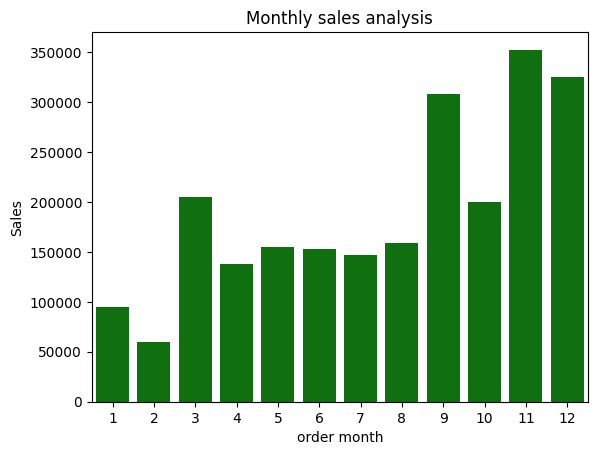

Highest sales month is November 
lowest sales month is feb


In [69]:
# Monthly sales:
sale_by_month=data.groupby('order month')['Sales'].sum().reset_index()
sns.barplot(x='order month',y='Sales',data=sale_by_month,color='g')

plt.title('Monthly sales analysis')
plt.show()
print('Highest sales month is November ')
print('lowest sales month is feb')


# To analyze sales based on product categories  and determine which category has the lowest sales and which category has the highest sales

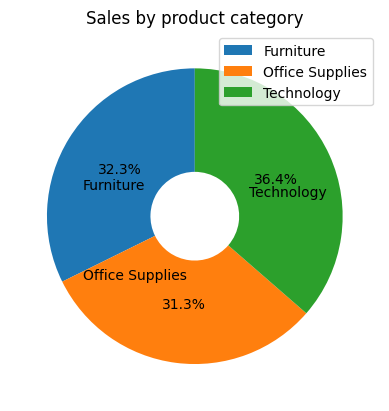

Highest category sales is technology
Lowest category sales is office supliers


In [154]:
sale_by_category=data.groupby('Category')['Sales'].sum().reset_index()
plt.pie(
    sale_by_category['Sales'],                   # values
    labels=sale_by_category['Category'],         # labels
    autopct='%1.1f%%',
    wedgeprops={'width':0.7},                    #inside the hole piechart
    labeldistance=0.4,
    startangle=90)                                    
plt.title('Sales by product category')
plt.legend(loc=0)
plt.show()
print('Highest category sales is technology')
print('Lowest category sales is office supliers')


# Analyze sales by sub-catyegory

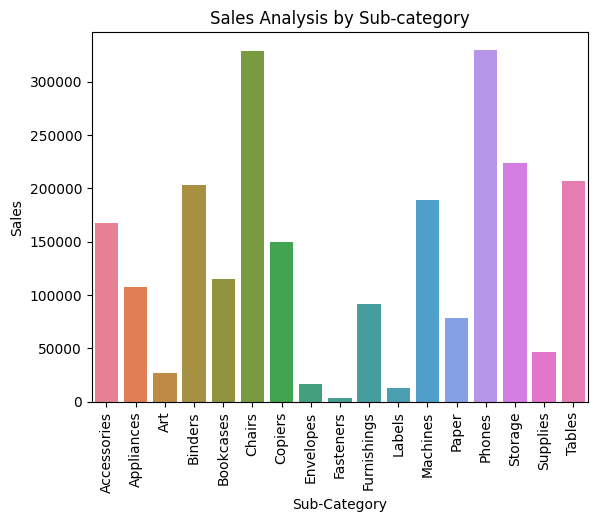

In [57]:
sale_by_subcategory=data.groupby('Sub-Category')['Sales'].sum().reset_index()
sns.barplot(x='Sub-Category',y='Sales',data=sale_by_subcategory,hue='Sub-Category')
#sale_by_subcategory=df.sort_values(by='Sales', ascending= False)
plt.xticks(rotation=90)
plt.title('Sales Analysis by Sub-category')
plt.show()



# Analyze the monthly profit from sales and determine which month had highest profit

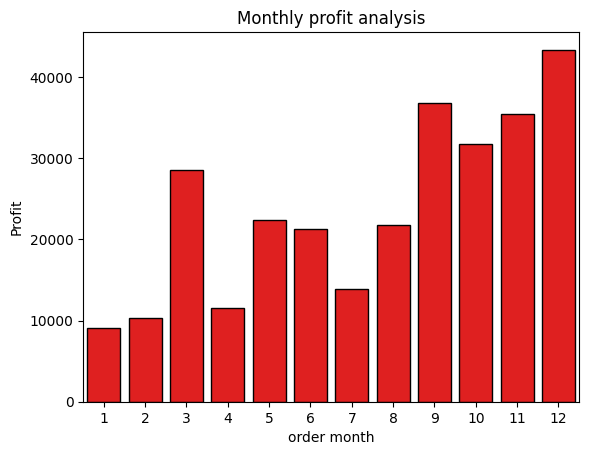

The highest profit month is:December


In [193]:
monthly_profit=data.groupby('order month')['Profit'].sum().reset_index()
sns.barplot(x='order month',y='Profit',data=monthly_profit,color='red',edgecolor='k')
plt.title('Monthly profit analysis')
plt.show()
print('The highest profit month is:December')



# Analyze the profit by category and sub-category

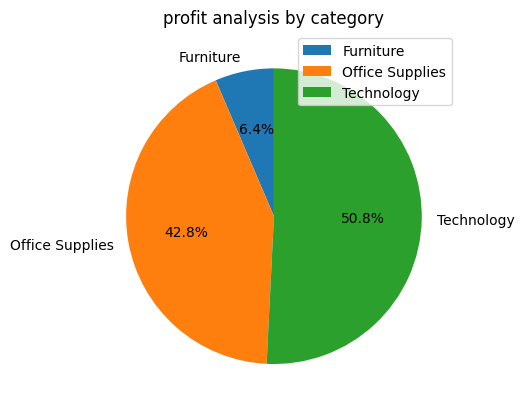

In [198]:
profit_by_category=data.groupby('Category')['Profit'].sum().reset_index()
plt.pie(
    profit_by_category['Profit'],                   
    labels=profit_by_category['Category'],         
    autopct='%1.1f%%',                    
    startangle=90)   
plt.title('profit analysis by category')

plt.legend(loc=1)
plt.show()


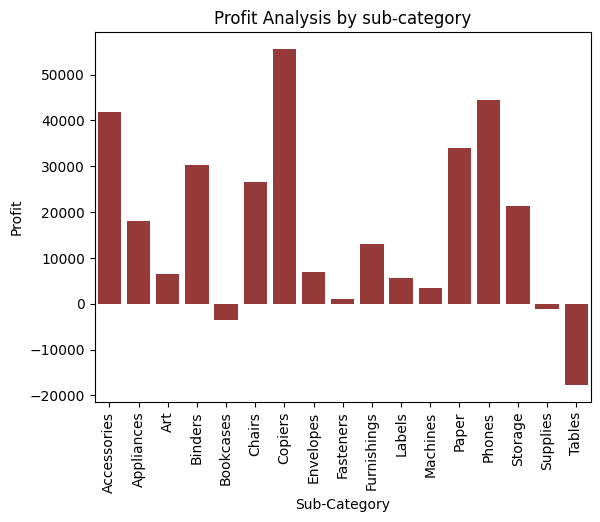

The highest profit sub-category is:copiers


In [32]:
profit_by_subcategory=data.groupby('Sub-Category')['Profit'].sum().reset_index()
sns.barplot(profit_by_subcategory,x='Sub-Category',y='Profit',color='brown')
plt.xticks(rotation=90)
plt.title('Profit Analysis by sub-category')
plt.show()
print('The highest profit sub-category is:copiers')

# Analyze the sales and profit by customer segment

Text(0, 0.5, 'Profit')

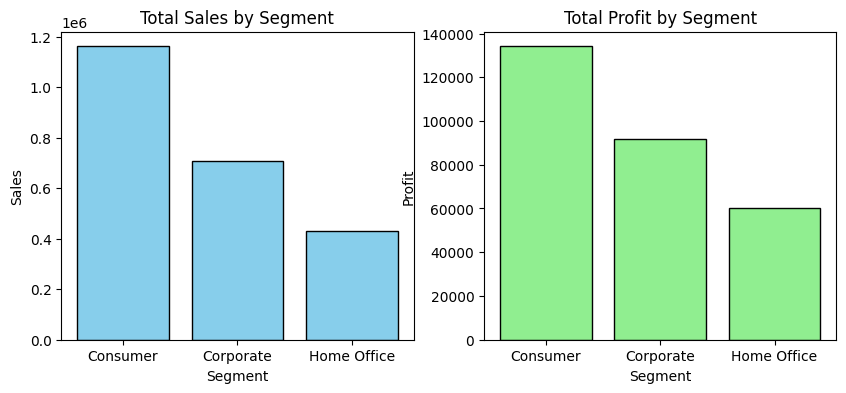

In [54]:
sales_profit_by_segment=data.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
sales_profit_by_segment
# Set figure size
plt.figure(figsize=(10, 4))

# Bar Plot 1: Sales by Segment
plt.subplot(1, 2, 1)
plt.bar(sales_profit_by_segment['Segment'], sales_profit_by_segment['Sales'], color='skyblue',edgecolor='k')
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')

# Bar Plot 2: Profit by Segment
plt.subplot(1, 2, 2)
plt.bar(sales_profit_by_segment['Segment'], sales_profit_by_segment['Profit'], color='lightgreen',edgecolor='k')
plt.title('Total Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Profit')


# Analyze the sales to profit ratio

In [56]:
sales_profit_by_segment=data.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
sales_profit_by_segment['sales_to_profit_ratio']=sales_profit_by_segment['Sales']/sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment','sales_to_profit_ratio']])

       Segment  sales_to_profit_ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
